# Growth of the Kochbar Dataset

The kochbar dataset has shown an irregular growth in its recipe count. This will be investigated in the following script.

In [1]:
import json
import pandas as pd

with open('data/kochbar_10.json') as data_file:    
    kochbar10 = json.load(data_file)
    
date = []
for i, r in enumerate(kochbar10):
    date = kochbar10[i]['date'].split('.')
    kochbar10[i]['year'] = date[2]
    kochbar10[i]['month'] = date[1]
    kochbar10[i]['day'] = date[0]
    
kochdf = pd.DataFrame(kochbar10)
kochdf['avg_rating'] = pd.to_numeric(kochdf['avg_rating'].str.replace(',','.'))
kochdf['clicks'] = pd.to_numeric(kochdf['clicks'])
kochdf['comment_number'] = pd.to_numeric(kochdf['comment_number'])
kochdf['favorites'] = pd.to_numeric(kochdf['favorites'])
kochdf['number_votes'] = pd.to_numeric(kochdf['number_votes'])
kochdf['time_mins'] = pd.to_numeric(kochdf['time_mins'])
kochdf['date'] = pd.to_datetime(kochdf['date'], format="%d.%m.%Y")
kochdf = kochdf.drop(['avg_rating', 'calories', 'difficulty', 'ingredients', 
                      'preparation', 'price', 'subtitle', 'time_hrs', 
                      'time_mins'], axis=1).dropna()
kochdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325828 entries, 0 to 330715
Data columns (total 10 columns):
clicks            325828 non-null int64
comment_number    325828 non-null int64
date              325828 non-null datetime64[ns]
day               325828 non-null object
favorites         325828 non-null int64
month             325828 non-null object
name              325828 non-null object
number_votes      325828 non-null int64
user              325828 non-null object
year              325828 non-null object
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 27.3+ MB


This initial DataFrame holds all recipes that will be used in the following analysis. Thus, all recipes that were published after the October dataset's last (maximum) date will be filtered.
For these preprocessing steps, we can create one function that can easily be replicated for each dataset.

When joining the newer datasets with the old one, we need a unique index to find the correct data points to join.
For this purpose, the combination of the attributes name and user will be used with the assumption that one user would not publish two recipes with exactly the same name.

In [2]:
max_date = kochdf['date'].max()  # 2017-10-13
columns = ['avg_rating', 'calories', 
           'difficulty', 'ingredients', 'preparation', 
           'price', 'subtitle', 'time_hrs', 'time_mins']
numerics = ['clicks', 'comment_number', 'favorites', 'number_votes']

def preprocess(data):
    df = pd.DataFrame(data)
    df['date'] = pd.to_datetime(df['date'], format="%d.%m.%Y")
    #df = df.loc[df['date'] <= max_date]
    for c in numerics:
        df[c] = pd.to_numeric(df[c])
    df = df.drop(columns, axis=1).dropna()
    return df

In [3]:
with open('data/kochbar_11.json') as data_file:    
    kochbar11 = json.load(data_file)
koch11df = preprocess(kochbar11)
koch11df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325668 entries, 0 to 330567
Data columns (total 7 columns):
clicks            325668 non-null int64
comment_number    325668 non-null int64
date              325668 non-null datetime64[ns]
favorites         325668 non-null int64
name              325668 non-null object
number_votes      325668 non-null int64
user              325668 non-null object
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 19.9+ MB


In [4]:
with open('data/kochbar_12.json') as data_file:    
    kochbar12 = json.load(data_file)

koch12df = preprocess(kochbar12)
koch12df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419327 entries, 0 to 425635
Data columns (total 7 columns):
clicks            419327 non-null int64
comment_number    419327 non-null int64
date              419327 non-null datetime64[ns]
favorites         419327 non-null int64
name              419327 non-null object
number_votes      419327 non-null int64
user              419327 non-null object
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 25.6+ MB


In [5]:
with open('data/kochbar_01.json') as data_file:    
    kochbar01 = json.load(data_file)
    
koch01df = preprocess(kochbar01)
koch01df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415074 entries, 0 to 421351
Data columns (total 7 columns):
clicks            415074 non-null int64
comment_number    415074 non-null int64
date              415074 non-null datetime64[ns]
favorites         415074 non-null int64
name              415074 non-null object
number_votes      415074 non-null int64
user              415074 non-null object
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 25.3+ MB


In [6]:
with open('data/kochbar_02.json') as data_file:    
    kochbar02 = json.load(data_file)
    
koch02df = preprocess(kochbar02)
koch02df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414311 entries, 0 to 420581
Data columns (total 7 columns):
clicks            414311 non-null int64
comment_number    414311 non-null int64
date              414311 non-null datetime64[ns]
favorites         414311 non-null int64
name              414311 non-null object
number_votes      414311 non-null int64
user              414311 non-null object
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 25.3+ MB


In [7]:
with open('data/kochbar_03.json') as data_file:    
    kochbar03 = json.load(data_file)
    
koch03df = preprocess(kochbar03)
koch03df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407539 entries, 0 to 413768
Data columns (total 7 columns):
clicks            407539 non-null int64
comment_number    407539 non-null int64
date              407539 non-null datetime64[ns]
favorites         407539 non-null int64
name              407539 non-null object
number_votes      407539 non-null int64
user              407539 non-null object
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 24.9+ MB


In [8]:
print(len(kochdf.loc[kochdf['date'] == max_date]))
print(len(koch11df.loc[koch11df['date'] == max_date]))
print(len(koch12df.loc[koch12df['date'] == max_date]))
print(len(koch01df.loc[koch01df['date'] == max_date]))
print(len(koch02df.loc[koch02df['date'] == max_date]))
print(len(koch03df.loc[koch03df['date'] == max_date]))

16
14
14
14
13
8


Each new datasets has less recipes published on the same date: the latest date contained in the October dataset.

In [9]:
max_date11 = koch11df['date'].max()
max_date12 = koch12df['date'].max()
max_date01 = koch01df['date'].max()
max_date02 = koch02df['date'].max()
max_date03 = koch03df['date'].max()

In [10]:
# Each month's new recipes
print(len(kochdf.loc[kochdf['date'] >= max_date]))
print(len(koch11df.loc[koch11df['date'] >= max_date]))
print(len(koch12df.loc[koch12df['date'] >= max_date11]))
print(len(koch01df.loc[koch01df['date'] >= max_date12]))
print(len(koch02df.loc[koch02df['date'] >= max_date01]))
print(len(koch03df.loc[koch03df['date'] >= max_date02]))

16
307
399
393
349
362


The kochbar dataset has grown by 300-400 recipes per month since October, which sums up to approx. 1800-2000 recipes (counting the recipes with newer publication dates).
However, the total recipe count of kochbar has grown by more than 82,000.
This means that more than 80,000 recipes with older dates have been added to the datasets as well.

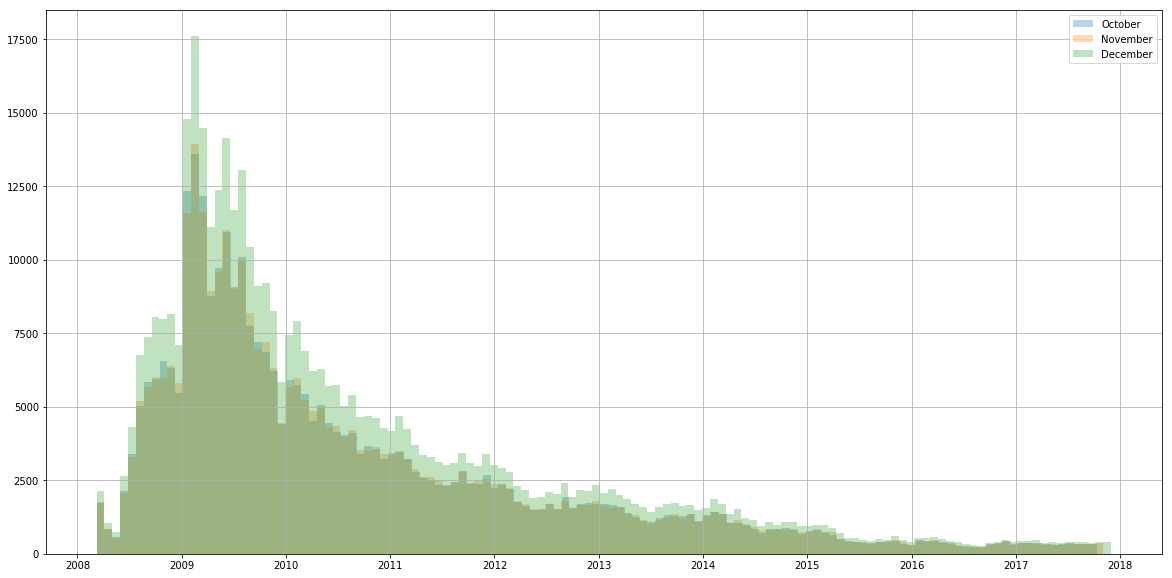

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

kochdf['date'].hist(bins=127, alpha=0.3, figsize=(20,10), label="October")
koch11df['date'].hist(bins=128, alpha=0.3, figsize=(20,10), label="November")
koch12df['date'].hist(bins=129, alpha=0.3, figsize=(20,10), label="December")

plt.legend()
plt.show()

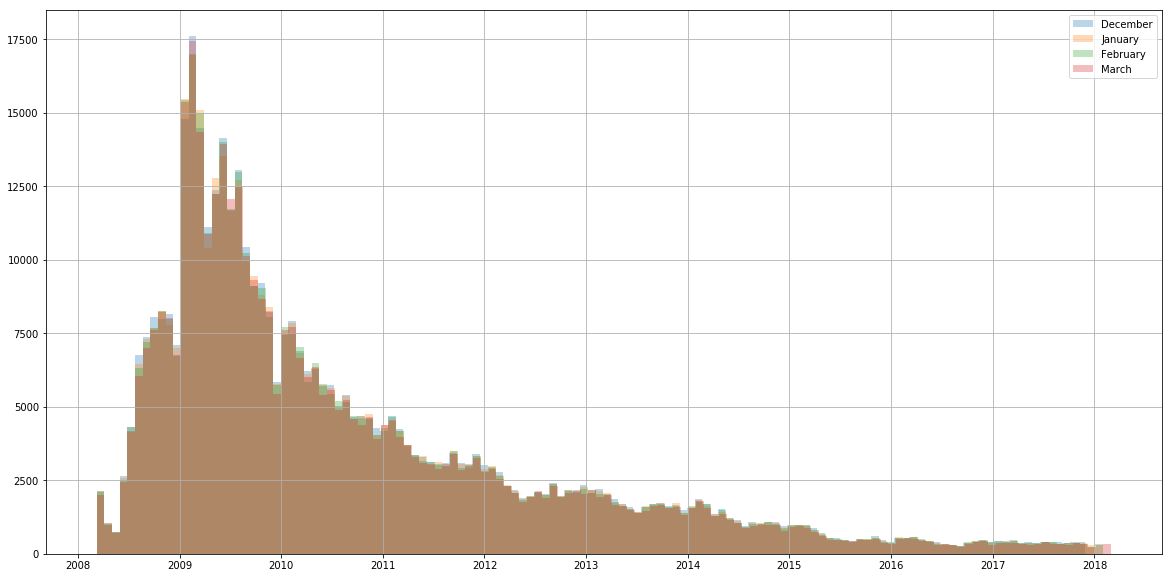

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

koch12df['date'].hist(bins=129, alpha=0.3, figsize=(20,10), label="December")
koch01df['date'].hist(bins=130, alpha=0.3, figsize=(20,10), label="January")
koch02df['date'].hist(bins=131, alpha=0.3, figsize=(20,10), label="February")
koch03df['date'].hist(bins=132, alpha=0.3, figsize=(20,10), label="March")

plt.legend()
plt.show()

All website snapshots have changing amounts of recipes for older months.
However, the largest difference is the increase in December (2017), where up to approximately 4,000 recipes were added with a publication date in February 2009.
This proves the inconsistent database management on kochbar, as the same scraper has been used for all six snapshots.